# Data Visualization

In [30]:
from utils import load_all_results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load results

In [31]:
all_results = load_all_results()

In [32]:
all_results.keys()

dict_keys(['MNIST_PERFORMER_RELU', 'MNIST_PERFORMER_APPROXIMATION_16', 'MNIST_PERFORMER_APPROXIMATION_32', 'MNIST_PERFORMER_APPROXIMATION_64', 'MNIST_PERFORMER_APPROXIMATION_128', 'MNIST_TRANSFORMER_LOCAL_ATTN_4', 'MNIST_TRANSFORMER_LOCAL_ATTN_16', 'MNIST_TRANSFORMER_LOCAL_ATTN_32', 'CIFAR_PERFORMER_RELU', 'CIFAR_PERFORMER_APPROXIMATION_16', 'CIFAR_PERFORMER_APPROXIMATION_32', 'CIFAR_PERFORMER_APPROXIMATION_64', 'CIFAR_PERFORMER_APPROXIMATION_128', 'CIFAR_TRANSFORMER_LOCAL_ATTN_4', 'CIFAR_TRANSFORMER_LOCAL_ATTN_16', 'CIFAR_TRANSFORMER_LOCAL_ATTN_32'])

## Show results

In [60]:
def fetch_accuracy_data_to_draw_boxplot(results, task):
    boxplot_data = {}
    for model_name, result in results.items():
        if task not in model_name:
            continue
        model_name = "_".join(model_name.split('_')[1:])
        boxplot_data[model_name] = []
        for instance_id, instance_result in result.items():
            opt_model_index = instance_result['val_accuracies'].index(max(instance_result['val_accuracies']))
            boxplot_data[model_name].append(instance_result['test_accuracies'][opt_model_index])
        
        if not boxplot_data[model_name]:
            boxplot_data.pop(model_name)
    
    return boxplot_data


def fetch_time_data_to_draw_boxplot(results, task):
    boxplot_data = {}
    for model_name, result in results.items():
        if task not in model_name:
            continue
        model_name = "_".join(model_name.split('_')[1:])
        boxplot_data[model_name] = []
        for instance_id, instance_result in result.items():
            boxplot_data[model_name].append(instance_result['time'])
        
        if not boxplot_data[model_name]:
            boxplot_data.pop(model_name)
    
    return boxplot_data


def draw_boxplot(boxplot_data, title, ylabel, save_path=None):
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=pd.DataFrame(boxplot_data))
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('Model', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')
    plt.show()

In [61]:
mnist_acc_boxplot_data = fetch_accuracy_data_to_draw_boxplot(all_results, task='MNIST')
mnist_time_boxplot_data = fetch_time_data_to_draw_boxplot(all_results, task='MNIST')
cifar_acc_boxplot_data = fetch_accuracy_data_to_draw_boxplot(all_results, task='CIFAR')
cifar_time_boxplot_data = fetch_time_data_to_draw_boxplot(all_results, task='CIFAR')

### Accuracy

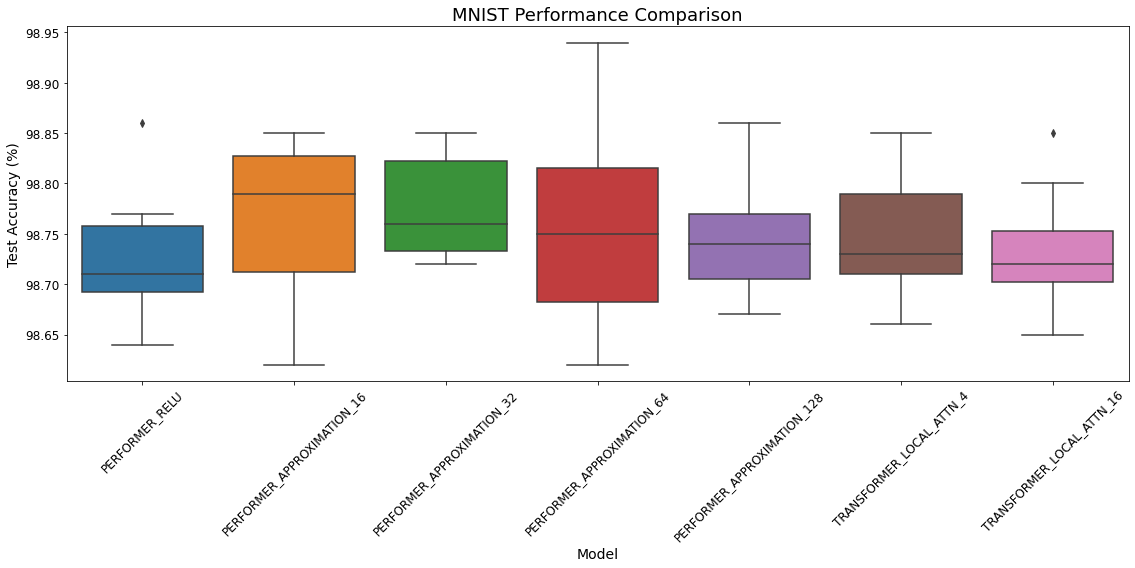

In [62]:
draw_boxplot(mnist_acc_boxplot_data, title='MNIST Performance Comparison', ylabel='Test Accuracy (%)', save_path='./figures/mnist_accuracy.png')

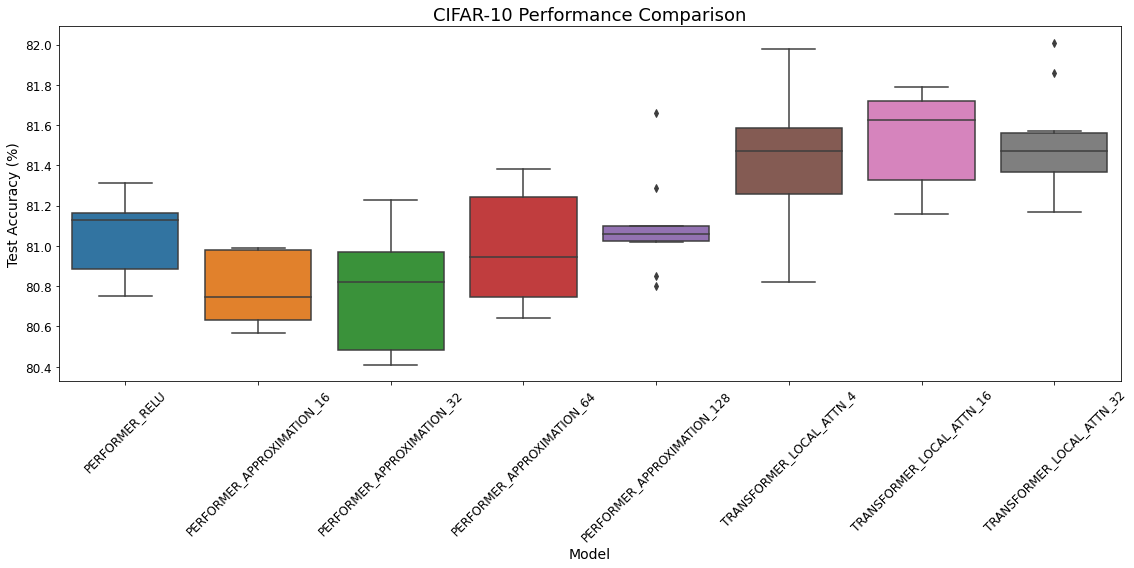

In [63]:
draw_boxplot(cifar_acc_boxplot_data, title='CIFAR-10 Performance Comparison', ylabel='Test Accuracy (%)', save_path='./figures/cifar_accuracy.png')

### Running Time

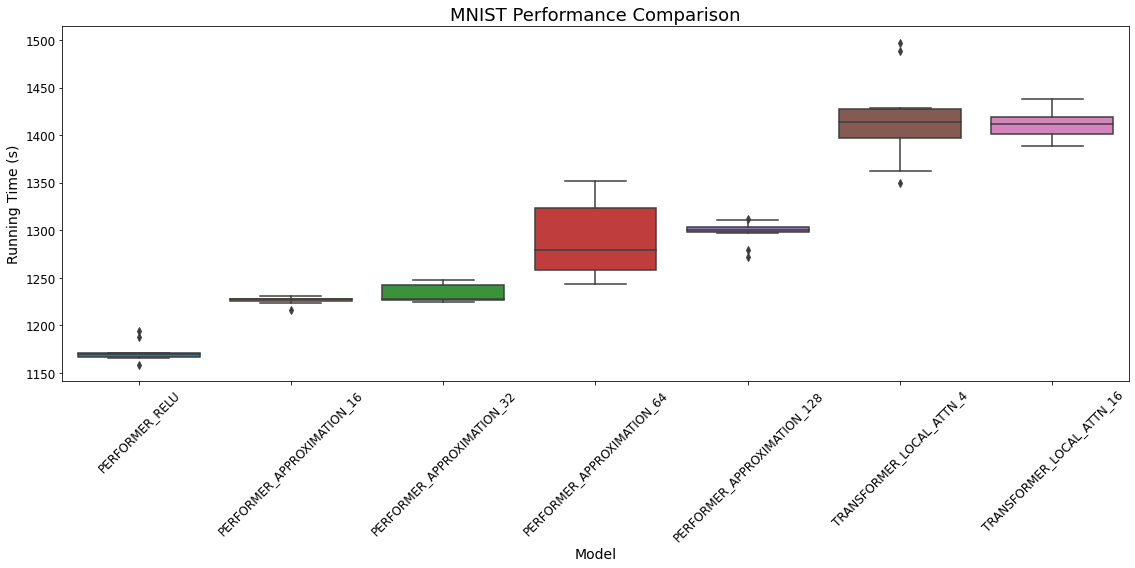

In [64]:
draw_boxplot(mnist_time_boxplot_data, title='MNIST Performance Comparison', ylabel='Running Time (s)', save_path='./figures/mnist_time.png')

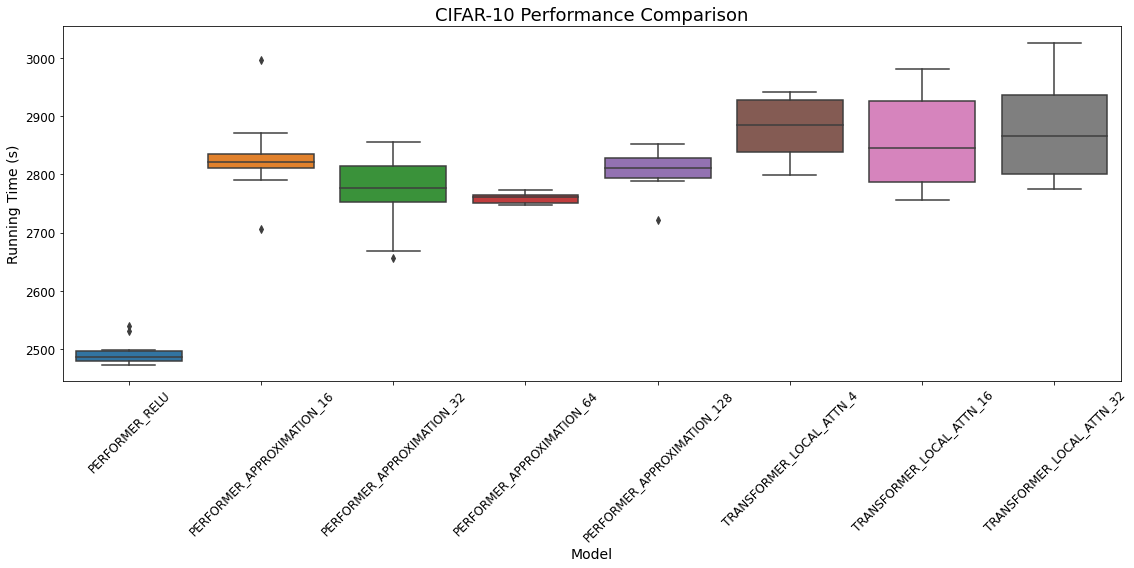

In [65]:
draw_boxplot(cifar_time_boxplot_data, title='CIFAR-10 Performance Comparison', ylabel='Running Time (s)', save_path='./figures/cifar_time.png')